# Autoregressive (AR) model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AutoReg

from math import sqrt
from sklearn.metrics import mean_squared_error

In [2]:
url = 'https://raw.githubusercontent.com/marcopeix/time-series-analysis/master/data/jj.csv'
df = pd.read_csv(url, index_col = 0, parse_dates = True)
df.head(5)

,data
date,
1960-01-01,0.71
1960-04-01,0.63
1960-07-02,0.85
1960-10-01,0.44
1961-01-01,0.61


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84 entries, 1960-01-01 to 1980-10-01
Data columns (total 1 columns):
data    84 non-null float64
dtypes: float64(1)
memory usage: 1.3 KB


In [4]:
df.shape

(84, 1)

In [5]:
df.isnull().sum()

data    0
dtype: int64

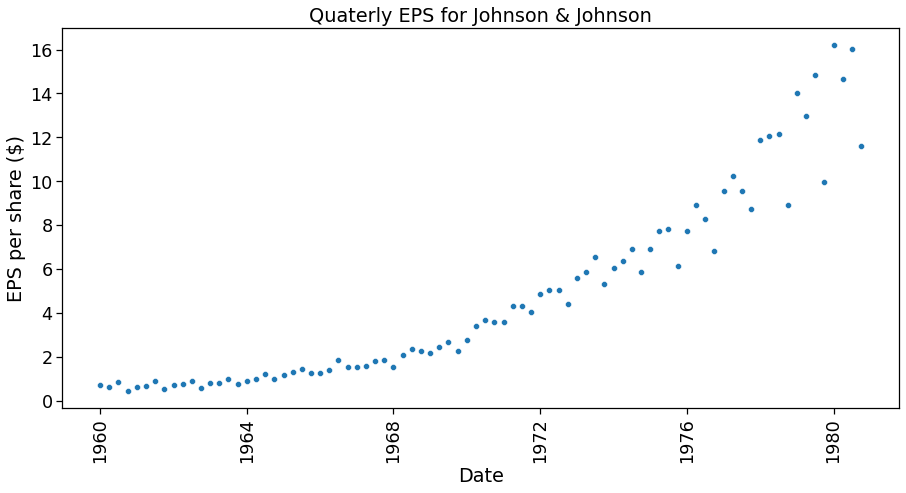

In [6]:
plt.figure(figsize = (15,7))

sns.set_context(context = 'notebook', font_scale=1.6)

sns.scatterplot(x = 'date' , y = 'data', data = df)
plt.title('Quaterly EPS for Johnson & Johnson')
plt.ylabel('EPS per share ($)')
plt.xlabel('Date')
plt.xticks(rotation=90)

plt.show()

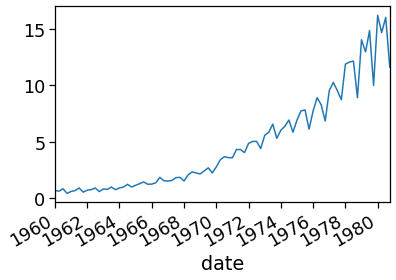

In [7]:
df['data'].plot()
plt.show()

In [8]:
# Take the log difference to make data stationary

df['data'] = np.log(df['data'])
df['data'] = df['data'].diff()
df = df.drop(df.index[0])
df.head()

,data
date,
1960-04-01,-0.119545
1960-07-02,0.299517
1960-10-01,-0.658462
1961-01-01,0.326684
1961-04-02,0.123233


In [9]:
# check the stationarity
dftest = adfuller(df['data'], autolag = 'AIC')

print('ADF :', dftest[0])
print('P-value :', dftest[1])
print('Num of lags :', dftest[2])
print('Num ofobsevations used for ADF regresion and critical values calculation :', dftest[3])
print('Critical Values :')
for key, val in dftest[4].items():
    print('\t', key, ': ', val)

ADF : -4.317043945811838
P-value : 0.00041497314044406503
Num of lags : 5
Num ofobsevations used for ADF regresion and critical values calculation : 77
Critical Values :
	 1% :  -3.518281134660583
	 5% :  -2.899878185191432
	 10% :  -2.5872229937594873


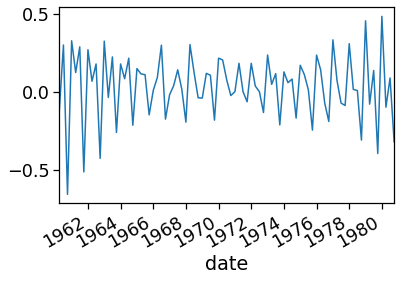

In [10]:
df['data'].plot()
plt.show()

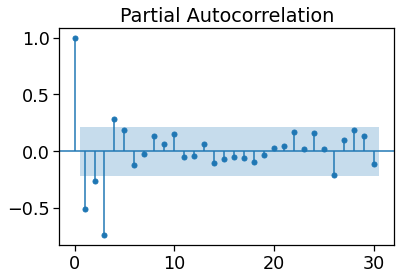

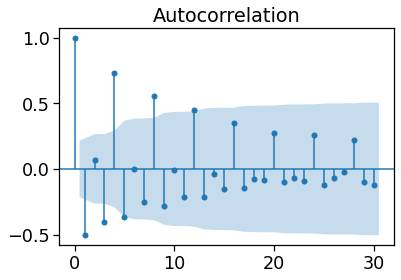

In [11]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
pacf = plot_pacf(df['data'], lags = 30)
acf = plot_acf(df['data'], lags = 30)

In [12]:
X = df.values
train = X[:len(X)-7]
test = X[len(X)-7:]

In [13]:
model = AutoReg(train, lags = 5).fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                   76
Model:                     AutoReg(5)   Log Likelihood                  77.345
Method:               Conditional MLE   S.D. of innovations              0.081
Date:                Tue, 09 Nov 2021   AIC                             -4.819
Time:                        20:30:23   BIC                             -4.596
Sample:                             5   HQIC                            -4.731
                                   76                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0994      0.023      4.364      0.000       0.055       0.144
y.L1          -0.7019      0.119     -5.906      0.000      -0.935      -0.469
y.L2          -0.5727      0.138     -4.164      0.0

/home/nina/.local/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [14]:
print(len(train))

76


[-0.01554251  0.01330493 -0.22951299  0.37355886 -0.00477487  0.00988072
 -0.16632487]


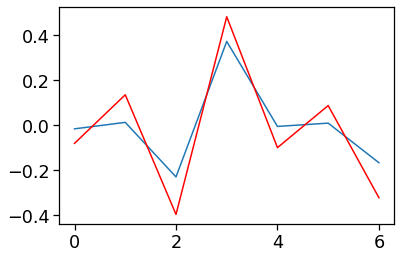

In [15]:
pred = model.predict(start=len(train), end=len(X)-1, dynamic = False)

plt.plot(pred)
plt.plot(test, color = 'red')
print(pred)

In [16]:
print('rmse' ,sqrt(mean_squared_error(test, pred)))

rmse 0.11857792204085194


In [18]:
nextweek = model.predict(start = len(X)+1, end=len(X)+7, dynamic = False)

print('The prediction for the next week :\n', nextweek)

The prediction for the next week :
 [ 0.00354815  0.00908176 -0.11754442  0.25474195  0.01014107  0.01004504
 -0.07991566]
number of predictions made : 7
